In [1]:
%run '00_rh_settings.ipynb'

Populating the interactive namespace from numpy and matplotlib


# Normality check with Bayesian approach

We can use generic test of normality, but we will the hard way

### Apple stocks check

In [2]:
ts_series=data.query("Stock == 'AAPL'")["Return"].dropna()

In [3]:
import pymc3 as pm

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Normal distribution

In [4]:
with pm.Model() as model_g:
    mu = pm.Uniform("mu", -100, 100)
    sigma = pm.HalfNormal("sigma")
    y = pm.Normal("y", mu=mu, sd=sigma, observed=ts_series)
    
    trace_g = pm.sample(1100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, mu_interval__]
100%|██████████| 1600/1600 [00:07<00:00, 224.35it/s]
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The acceptance probability does not match the target. It is 0.9494536569144436, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance pr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116722a90>,
      dtype=object)

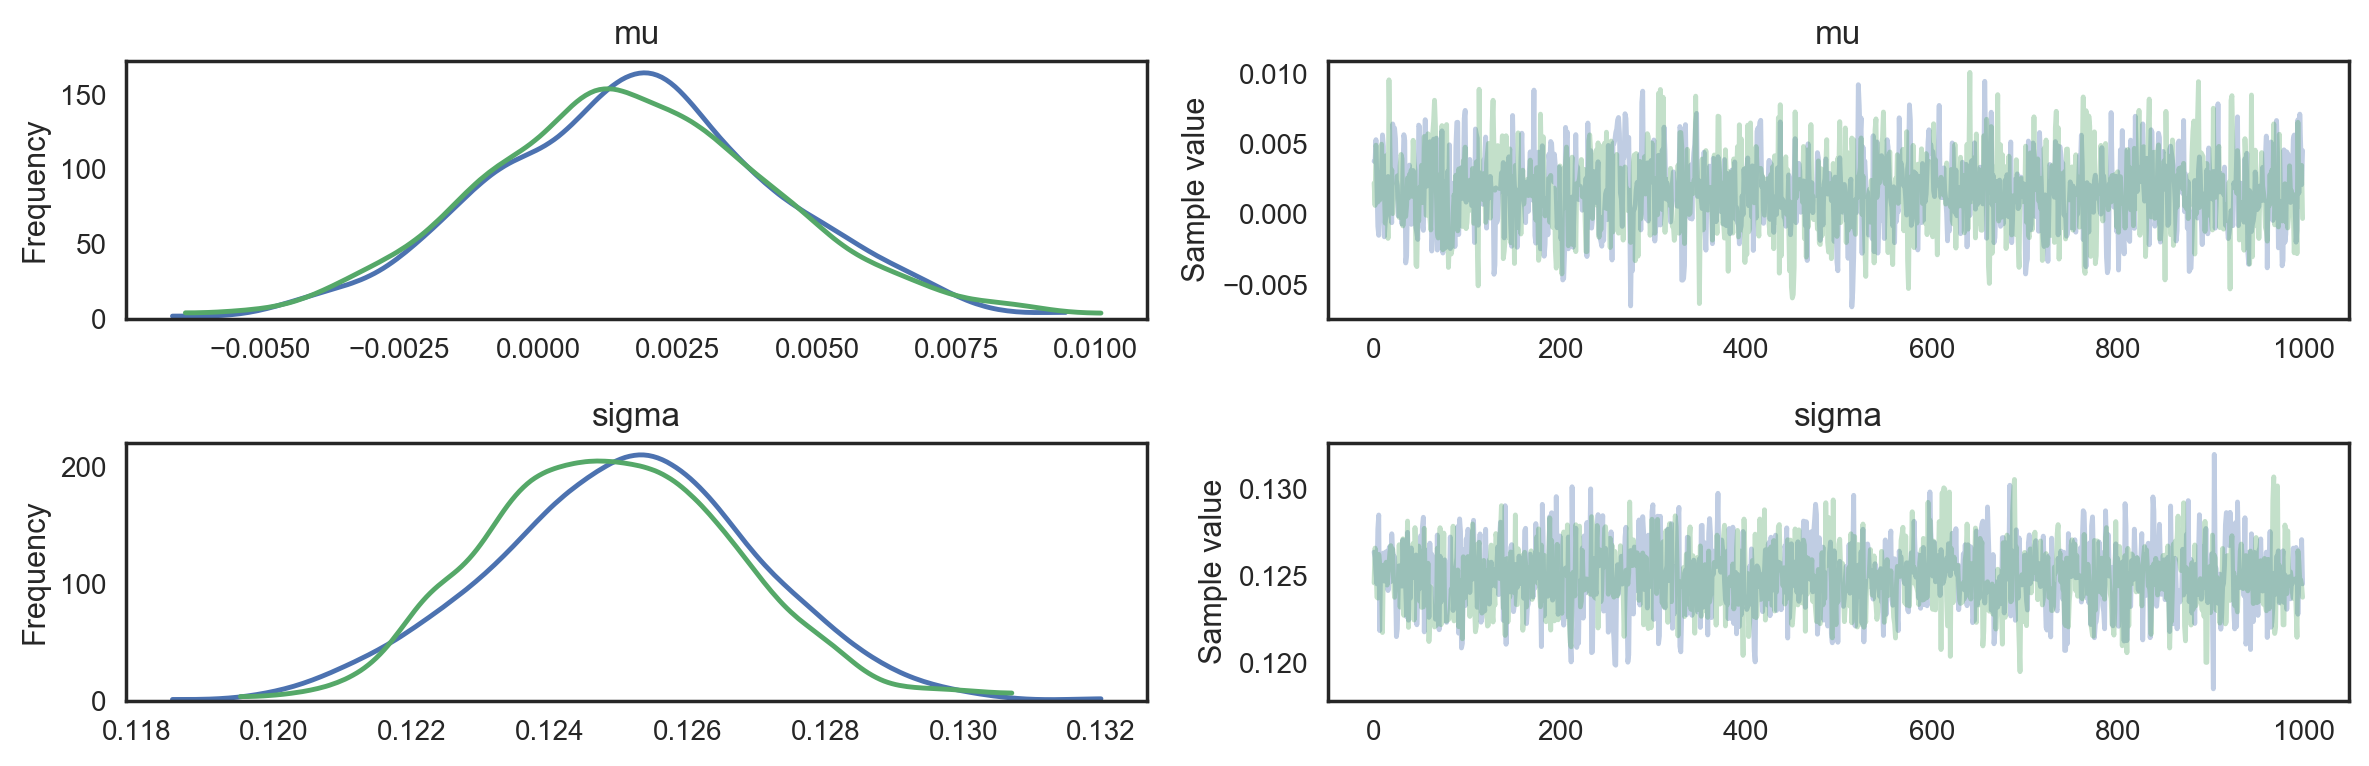

In [5]:
chain_g = trace_g[100:]
pm.traceplot(chain_g)

In [6]:
pm.stats.summary(trace_g)

/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,0.001631,0.002612,0.000062,-0.003277,0.006934,1567.542392,0.999597
sigma,0.124941,0.001839,0.000042,0.121417,0.128451,1565.234917,1.000877


We see big deviation in calculated mean, also in sigma itself. It means, that in our time-series we can have different  mean and standard deviation in different time-frame.

## Student distribution

In [7]:
with pm.Model() as model_t:
    mu = pm.Uniform("mu", -100, 100)
    sigma = pm.HalfNormal("sigma")
    nu = pm.Exponential('nu', 0.1)
    #nu = pm.Exponential('nu', lam=pm.math.exp(-2*sigma))
    y = pm.StudentT("y", mu=mu, sd=sigma, nu=nu, observed=ts_series)
    
    trace_t = pm.sample(1100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu_log__, sigma_log__, mu_interval__]
100%|██████████| 1600/1600 [00:07<00:00, 209.61it/s]
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The acceptance probability does not match the target. It is 0.9859014053095577, but should be close to 0.8. Try to increase the number of tuning steps.
The acc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118489588>,
      dtype=object)

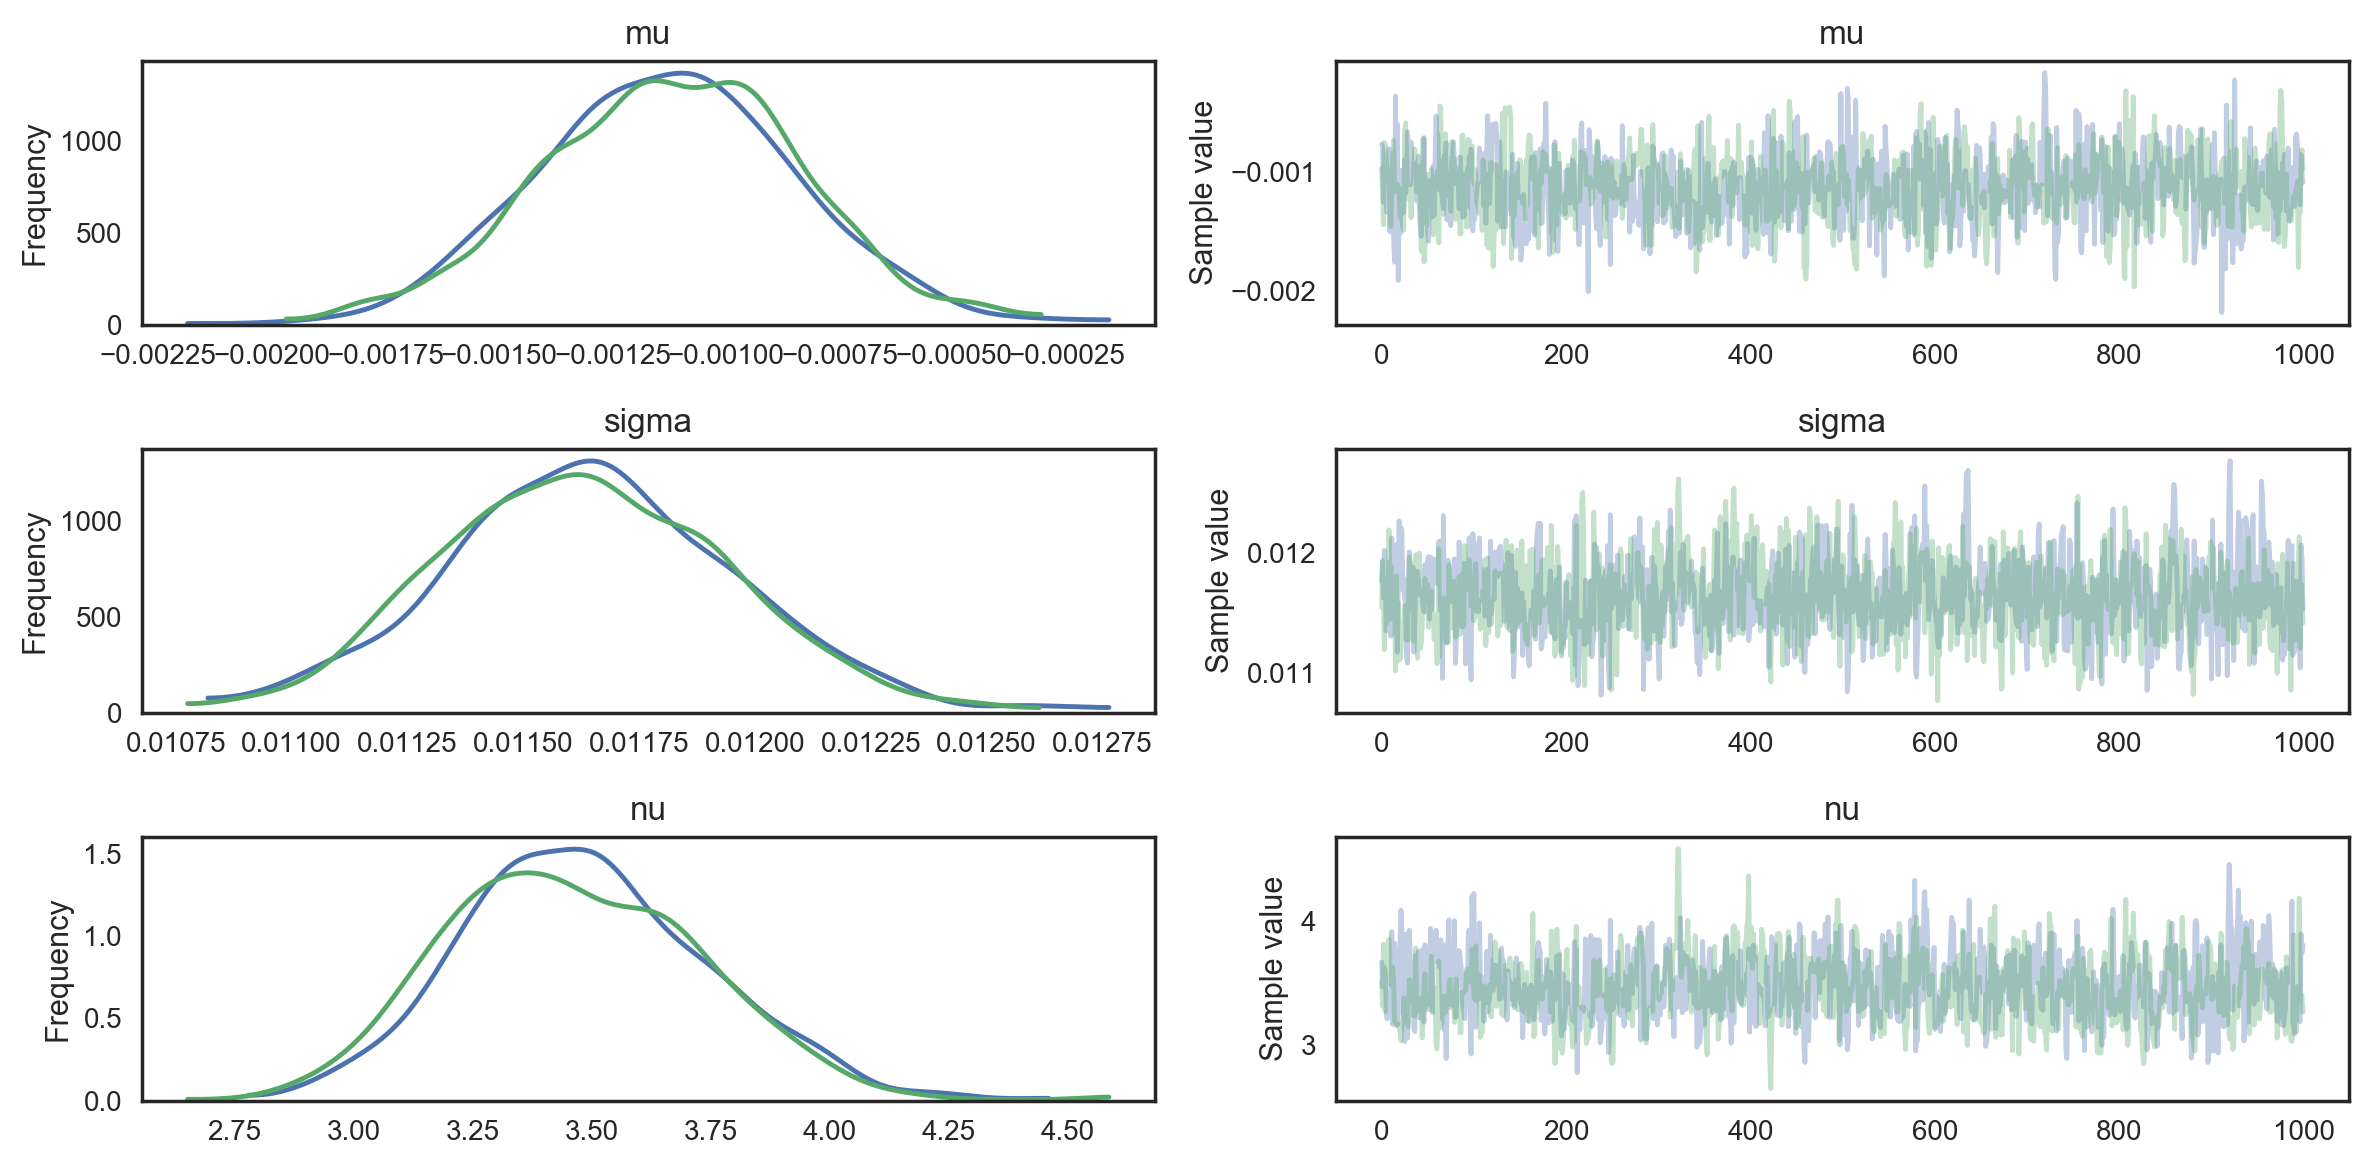

In [8]:
chain_t = trace_t[100:]
pm.traceplot(chain_t)

In [9]:
pm.stats.summary(trace_t)

/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,-0.001129,0.000282,0.000008,-0.001668,-0.000568,1129.312350,1.000255
sigma,0.011637,0.000308,0.000010,0.011054,0.012246,1057.317264,1.000071
nu,3.468783,0.258250,0.009232,3.014184,3.995038,709.044869,1.001424


Error in mean and in standard deviation became less.
Because exponential coefficient $\nu$ (nu) have value close to 4, we cant say that distribution is normal